In [ ]:
# パラメータの設定
VOCAB_SIZE = len(set(word2id.values())) + 1
EMB_SIZE = 300
PADDING_IDX = len(set(word2id.values()))
OUTPUT_SIZE = 4
HIDDEN_SIZE = 50
LEARNING_RATE = 5e-2
BATCH_SIZE = 32
NUM_EPOCHS = 10
NUM_LAYERS=1
# モデルの定義
model = RNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, OUTPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# デバイスの指定
device = torch.device('cuda')

# モデルの学習
log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, collate_fn=Padsequence(PADDING_IDX), device=device)


epoch: 1, loss_train: 1.2525, accuracy_train: 0.4115, loss_valid: 1.2548, accuracy_valid: 0.3943, 12.3564sec
epoch: 2, loss_train: 1.1720, accuracy_train: 0.5105, loss_valid: 1.1807, accuracy_valid: 0.4888, 11.4536sec
epoch: 3, loss_train: 1.0826, accuracy_train: 0.5883, loss_valid: 1.1278, accuracy_valid: 0.5427, 11.4213sec
epoch: 4, loss_train: 1.0402, accuracy_train: 0.6146, loss_valid: 1.0831, accuracy_valid: 0.5765, 10.9279sec
epoch: 5, loss_train: 0.9893, accuracy_train: 0.6457, loss_valid: 1.0506, accuracy_valid: 0.6102, 10.6652sec
epoch: 6, loss_train: 0.9357, accuracy_train: 0.6773, loss_valid: 1.0040, accuracy_valid: 0.6357, 11.3615sec
epoch: 7, loss_train: 0.8592, accuracy_train: 0.7160, loss_valid: 0.9303, accuracy_valid: 0.6844, 11.4997sec
epoch: 8, loss_train: 0.8347, accuracy_train: 0.7272, loss_valid: 0.9117, accuracy_valid: 0.6919, 11.3773sec
epoch: 9, loss_train: 0.8240, accuracy_train: 0.7197, loss_valid: 0.9307, accuracy_valid: 0.6664, 10.4543sec
epoch: 10, loss_tra

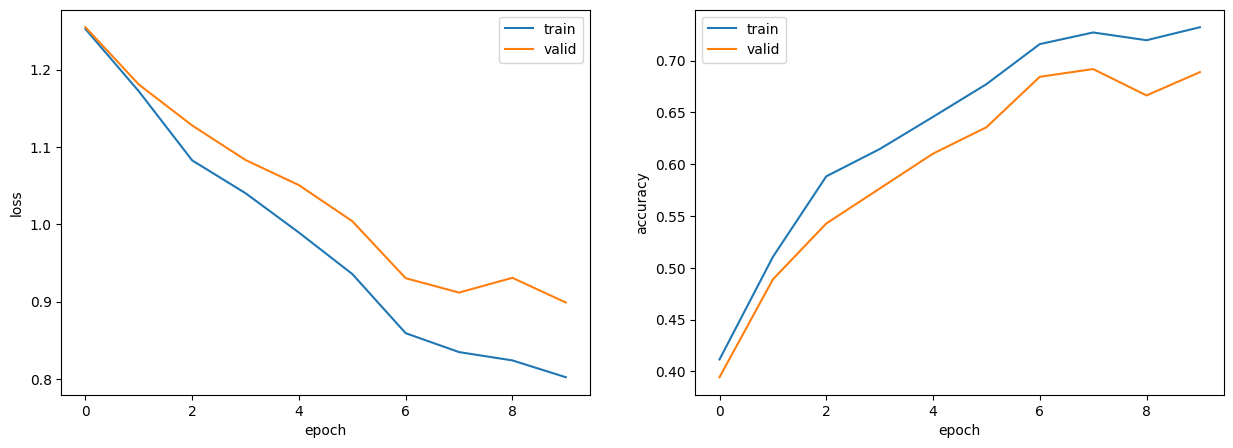

正解率（学習データ）：0.732
正解率（評価データ）：0.700


In [ ]:
# ログの可視化
visualize_logs(log)

# 正解率の算出
_, acc_train = calculate_loss_and_accuracy(model, dataset_train, device)
_, acc_test = calculate_loss_and_accuracy(model, dataset_test, device)
print(f'正解率（学習データ）：{acc_train:.3f}')
print(f'正解率（評価データ）：{acc_test:.3f}')